<a href="https://colab.research.google.com/github/dudns1234/Data_Analysis/blob/master/04_CNN_%EC%95%8C%EC%95%84%EB%B3%B4%EA%B8%B0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# MNIST 데이터 준비 및 시각화

In [1]:
import tensorflow as tf
from tensorflow.keras import datasets

import matplotlib.pyplot as plt

In [2]:
(X_train, y_train), (X_test, y_test) = datasets.mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


## 이미지 시각화 및 형상(shape) 확인

In [3]:
image = X_train[0]
image.shape

(28, 28)

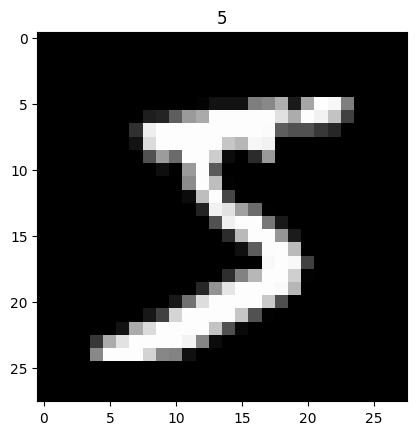

In [4]:
plt.imshow(image, 'gray')
plt.title(y_train[0])
plt.show()

## CNN 레이어에 삽입하기 위한 배열 편집
* 4차원 형태의 데이터를 유지해야 한다.
* `(N, H, W, C)` -> `(배치크기, 높이, 가로, 채널수)`
* MNIST 손글씨 이미지 : 높이 - 28px, 가로 - 28px, 채널 - 1ch
* 1장의 이미지 - `(28, 28)` -> `(1, 28, 28, 1)`로 바꿔줘야 한다.

In [5]:
image = image[tf.newaxis, ..., tf.newaxis]
image.shape

(1, 28, 28, 1)

# Conv 레이어 사용하기
keras의 대표적인 CNN 레이어는 두가지가 있다.
1. Conv2D
  * `stride`가 2 방향으로 움직인다.( 가로, 세로 )
  * 이미지 분석을 위해 사용되는 일반적인 합성곱 레이어
2. Conv1D
  * `stride`가 1 방향으로 움직인다. (세로)
  * 텍스트 분석을 위해 사용되는 레이어. ( 대표적인 예 `char CNN` )

# Conv2D 매개변수 확인
* `filters` : 필터의 개수 ($C_{out}$)
* `kernel_size`: 필터의 크기 ($K_H$, $K_W$)
* `strides` : 몇 개의 픽셀을 스킵하면서 필터가 훑게 할지 결정 ( 스트라이드가 커지면 출력 특징맵의 크기가 줄어 든다)
* `padding`: 0으로 쌓여진 패딩을 만들 것인지에 대한 설정
  * `VALID` : 패딩을 만들지 않는다.
  * `SAME`  : 한개 짜리 패딩 생성 - 이미지 주변을 한줄로 감싸기
* `activation`: 활성화 함수 지정하기. 따로 지정하지 않고 추후에 레이어로 추가 가능



In [6]:
tf.keras.layers.Conv2D(
    filters = 3, # 필터 개수
    kernel_size = (3, 3), # 필터 ( 세로, 가로 ) 크기 1 x 1, 3 x 3, 5 x 5, 7 x 7 필터를 주로 사용
    strides=(1, 1), # 이동 크기
    padding='SAME', # 패딩 여부 ( same - 패딩 적용, valid - 패딩 미적용 )
    activation='relu' # 활성화 함수 적용 (여기서 안넣고 레이어로 따로 추가 가능.)
)

In [7]:
# 필터의 세로 가로 크기 및 스트라이드의 세로 가로를 똑같이 하려면 굳이 튜플을 쓸 필욘 없다.
tf.keras.layers.Conv2D(
    filters=3,
    kernel_size=3, # 3 x 3 필터
    strides=1, # 1 x 1 stirde
    padding='SAME',
    activation='relu'
)

## Convolution 레이어 시각화

In [8]:
image = tf.cast(image, dtype=tf.float32)
image.dtype

tf.float32

In [9]:
layer = tf.keras.layers.Conv2D(filters=5, kernel_size=3, strides=1, padding='SAME')

In [10]:
output = layer(image) # image를 레이어에 통과 시킴
output.shape

TensorShape([1, 28, 28, 5])

출력 특징 맵이 5개!

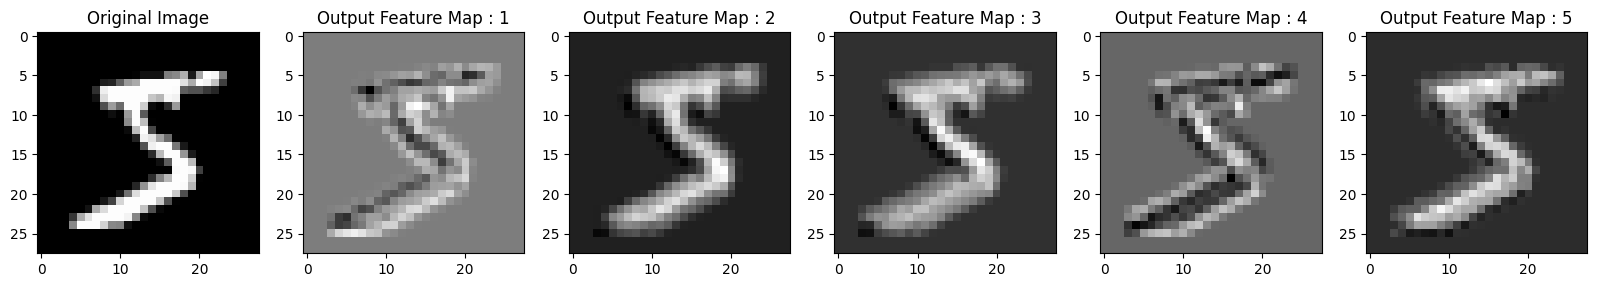

In [11]:
_, axes = plt.subplots(nrows=1, ncols=6, figsize=(20, 10))
axes[0].imshow(image[0, ..., 0], cmap='gray')
axes[0].set_title("Original Image")

for idx, ax in enumerate(axes[1:]):
  ax.set_title("Output Feature Map : {}".format(idx + 1))
  ax.imshow(output[0, ..., idx], cmap='gray')

plt.show()

## Filter 시각화 하기
* CNN에서 Filter의 역할은 실제 CNN 레이어가 이미지의 무엇을 보고 있는가를 이야기 한다.
* `keras`의 레이어들은 `get_weights()` 함수를 이용해서 편향과, 가중치 등을 볼 수 있다.

In [12]:
# Conv2D 레이어의 필터 모양 : ( 3, 3, 1, 5 ) - ( 필터 세로, 필터 가로, 입력 특징 맵의 채널 개수, 출력 특징 맵의 채널 개수)
weights = layer.get_weights()

* `weights[0]` : 가중치가 들어 있음
* `weights[1]` : 편향이 들어 있음


In [13]:
print("가중치(필터)의 형상 : {}".format(weights[0].shape))
print("편향의 형상 : {}".format(weights[1].shape))

가중치(필터)의 형상 : (3, 3, 1, 5)
편향의 형상 : (5,)


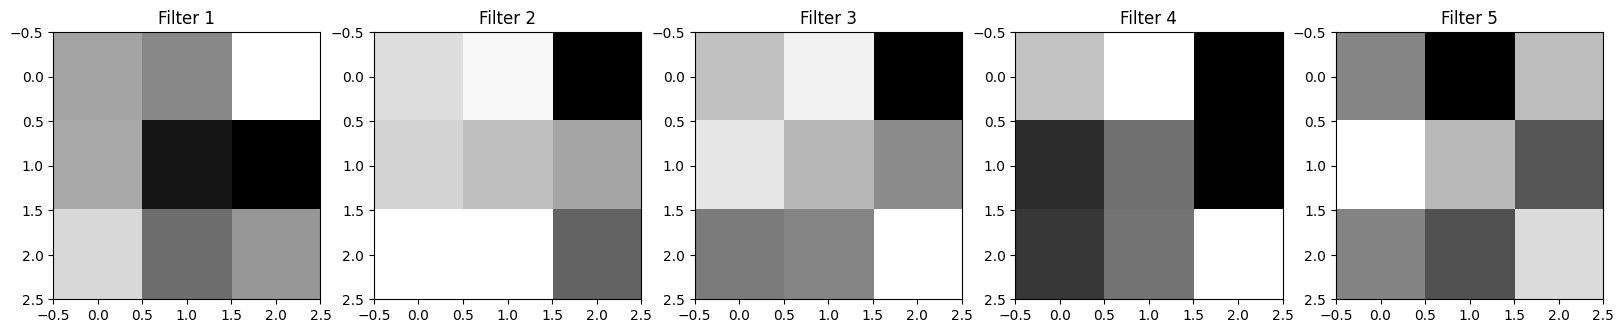

In [14]:
_, axes = plt.subplots(nrows=1, ncols=5, figsize=(20, 10))

for idx, ax in enumerate(axes):
  ax.set_title("Filter {}".format(idx + 1))
  ax.imshow(weights[0][..., 0, idx], cmap='gray')

plt.show()

# ReLU 레이어 사용하기
* 이미지 분석에서 `ReLU` 가 자주 사용된다.
* 이미지 데이터에서 음수 데이터는 필요가 없는 데이터이다.
  * 필요 없는 음수 데이터는 제거하고, 의미 있는 양수 데이터만 강조하기 위해서 `ReLU`가 일반적으로 사용된다.

In [15]:
import numpy as np
np.min(output), np.max(output)

(-101.410835, 351.65604)

In [16]:
act_layer = tf.keras.layers.ReLU()
act_output = act_layer(output) # 합성곱의 결과가 활성화 레이어로 들어간다.
act_output.shape

TensorShape([1, 28, 28, 5])

In [17]:
np.min(act_output), np.max(act_output)

(0.0, 351.65604)

## ReLU 시각화

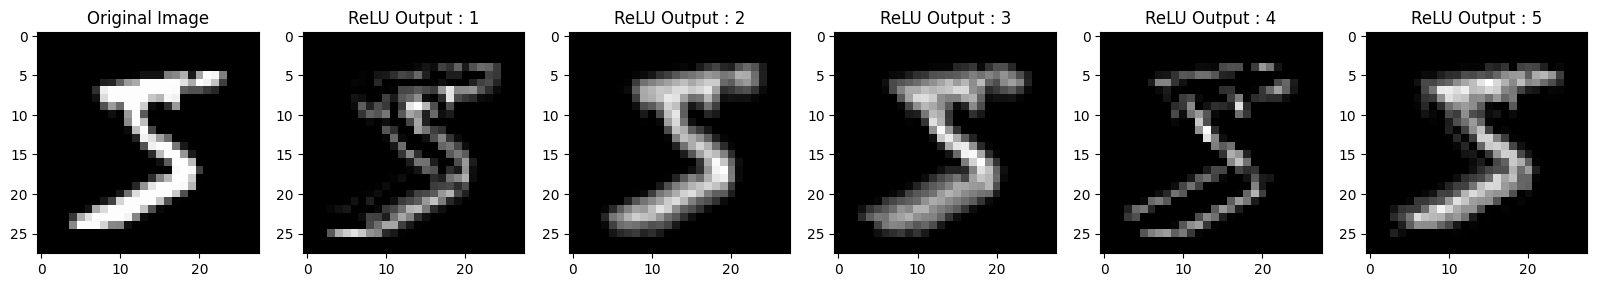

In [18]:
_, axes = plt.subplots(nrows=1, ncols=6, figsize=(20, 10))

axes[0].imshow(image[0, ..., 0], cmap='gray')
axes[0].set_title("Original Image")

for idx, ax in enumerate(axes[1:]):
  ax.set_title("ReLU Output : {}".format(idx + 1))
  ax.imshow(act_output[0, ..., idx], cmap='gray')

plt.show()

# MaxPooling 레이어 사용하기
`Pooling`과정을 통해 이미지 축소 및 정보의 종합을 구현할 수 있다.

In [19]:
pool_layer = tf.keras.layers.MaxPool2D(pool_size=(2, 2), strides=(2, 2), padding='SAME')
pool_output = pool_layer(act_output)

pool_output.shape

TensorShape([1, 14, 14, 5])

## MaxPooling 시각화

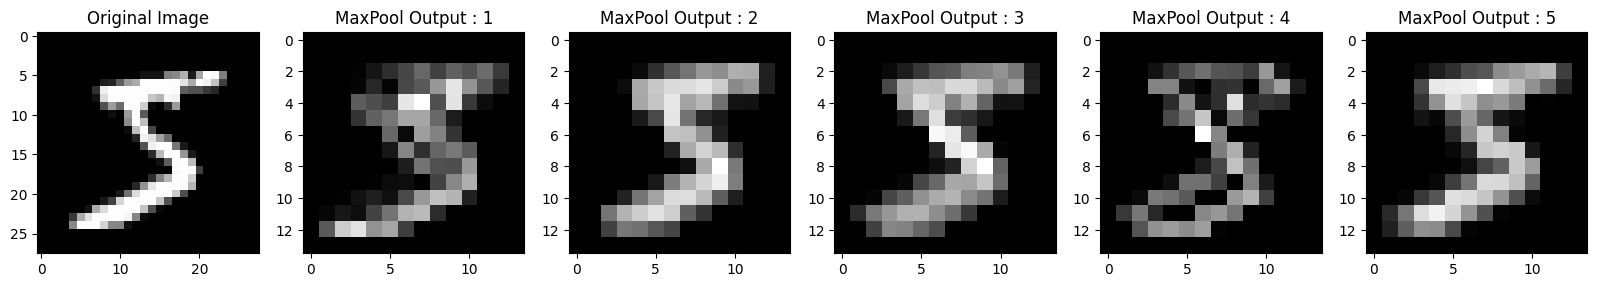

In [20]:
_, axes = plt.subplots(nrows=1, ncols=6, figsize=(20, 10))

axes[0].imshow(image[0, ..., 0], cmap='gray')
axes[0].set_title("Original Image")

for idx, ax in enumerate(axes[1:]):
  ax.set_title("MaxPool Output : {}".format(idx + 1))
  ax.imshow(pool_output[0, ..., idx], cmap='gray')

plt.show()

**여기까지의 과정을 특징 추출 과정(Feature Extraction)**

# Flatten 레이어 확인하기
* `MaxPool2D` 까지는 특징 추출 과정
  * 예측을 하기 위한 과정이 아닌, 데이터(이미지)에 대한 특징만 추출
* 예측을 수행하기 위해서는 `Fully Connected`(전결합) 과정이 필요하다.
  * `Dense` 레이어를 사용한다.
* `Fully Connected Layer`를 사용하기 위해서는 데이터가 **평탄화**되어 있어야 한다.

In [21]:
flatten_layer = tf.keras.layers.Flatten()
flatten_output = flatten_layer(pool_output)

flatten_output.shape

TensorShape([1, 980])

# Dense 레이어 확인하기
* 계산 과정 $WX+b$을 하기 위한 `Dense`레이어. `Fully Connected Layer` 라고도 한다.

In [22]:
# 유닛이 32개인 Dense 레이어 만들기 - 은닉층
dense_layer = tf.keras.layers.Dense(32, activation='relu')
dense_output = dense_layer(flatten_output)

dense_output.shape

TensorShape([1, 32])

In [23]:
# 출력층 설계
# 숫자는 10 종류니까 출력층의 뉴런 개수도 10개
dense_layer2 = tf.keras.layers.Dense(10, activation='softmax')
dense_output2 = dense_layer2(dense_output)

dense_output2.shape

TensorShape([1, 10])

# Sequential Model로 MNIST 분류기 만들기

In [24]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, ReLU, MaxPool2D, Flatten, Dense, Input

model = Sequential([
  Input(shape=(28, 28, 1)),
  Conv2D(filters=32, kernel_size=3, padding='SAME'),
  ReLU(),
  Conv2D(filters=32, kernel_size=3, padding='SAME'),
  ReLU(),
  MaxPool2D(pool_size=(2, 2)),

  Conv2D(filters=64, kernel_size=3, padding='SAME', activation='relu'),
  Conv2D(filters=64, kernel_size=3, padding='SAME', activation='relu'),
  MaxPool2D(pool_size=(2, 2)),

  Flatten(),

  Dense(512, activation='relu'),
  Dense(10, activation='softmax')
])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 28, 28, 32)        320       
                                                                 
 re_lu_1 (ReLU)              (None, 28, 28, 32)        0         
                                                                 
 conv2d_4 (Conv2D)           (None, 28, 28, 32)        9248      
                                                                 
 re_lu_2 (ReLU)              (None, 28, 28, 32)        0         
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 14, 14, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_5 (Conv2D)           (None, 14, 14, 64)        18496     
                                                        

In [25]:
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['acc']
)

In [26]:
X_train.shape, y_train.shape

((60000, 28, 28), (60000,))

In [27]:
# X 데이터에 채널 차원 추가
X_train = X_train[..., tf.newaxis]
X_test  = X_test[..., tf.newaxis]

X_train.shape, X_test.shape

((60000, 28, 28, 1), (10000, 28, 28, 1))

In [28]:
# 이미지 정규화 작업
# 255.0 으로 나눠주면 된다.

X_train = X_train / 255.0
X_test = X_test / 255.0

In [29]:
model.fit(X_train,
          y_train,
          validation_split=0.2,
          epochs=10,
          batch_size=32,
          shuffle=True)

Epoch 1/10
1500/1500 [==============================] - 12s 5ms/step - loss: 0.1115 - acc: 0.9650 - val_loss: 0.0523 - val_acc: 0.9843
Epoch 2/10
1500/1500 [==============================] - 8s 5ms/step - loss: 0.0408 - acc: 0.9875 - val_loss: 0.0378 - val_acc: 0.9888
Epoch 3/10
1500/1500 [==============================] - 7s 5ms/step - loss: 0.0253 - acc: 0.9924 - val_loss: 0.0407 - val_acc: 0.9895
Epoch 4/10
1500/1500 [==============================] - 7s 5ms/step - loss: 0.0205 - acc: 0.9933 - val_loss: 0.0370 - val_acc: 0.9899
Epoch 5/10
1500/1500 [==============================] - 7s 5ms/step - loss: 0.0153 - acc: 0.9949 - val_loss: 0.0543 - val_acc: 0.9882
Epoch 6/10
1500/1500 [==============================] - 8s 5ms/step - loss: 0.0128 - acc: 0.9961 - val_loss: 0.0362 - val_acc: 0.9919
Epoch 7/10
1500/1500 [==============================] - 8s 5ms/step - loss: 0.0105 - acc: 0.9965 - val_loss: 0.0516 - val_acc: 0.9902
Epoch 8/10
1500/1500 [==============================] - 8s 5m

# 훈련 완료 후 필터 시각화

In [30]:
conv_layers = [layer for layer in model.layers if layer.__class__.__name__ == "Conv2D"]
conv_layers

1 층의 Conv Layer 필터


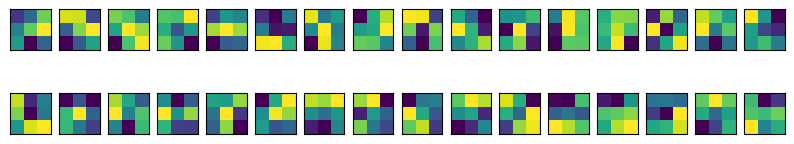

2 층의 Conv Layer 필터


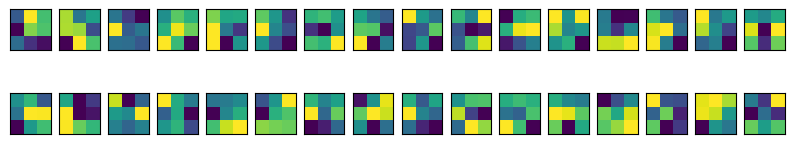

3 층의 Conv Layer 필터


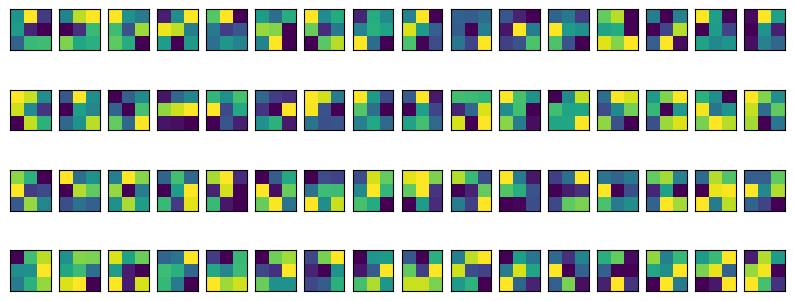

4 층의 Conv Layer 필터


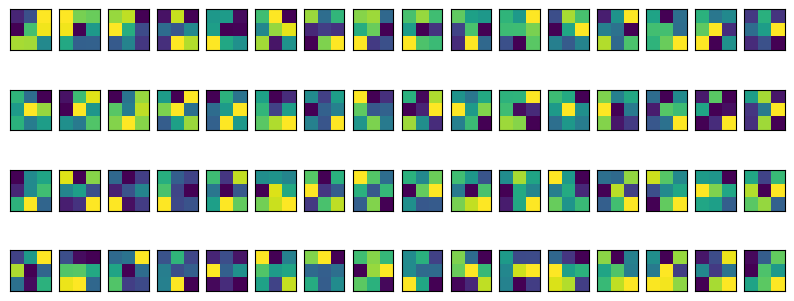

In [31]:
for i, conv_layer in enumerate(conv_layers):
  print(f"{i+1} 층의 Conv Layer 필터")

  weights = conv_layer.get_weights()[0]

  _, axes = plt.subplots(nrows=int(weights.shape[-1]/16), ncols=16, figsize=(10, int(weights.shape[-1]/16)))

  for idx, ax in enumerate(axes.ravel()):
    ax.set_xticks([])
    ax.set_yticks([])
    ax.imshow(weights[..., 0, idx])

  plt.show()

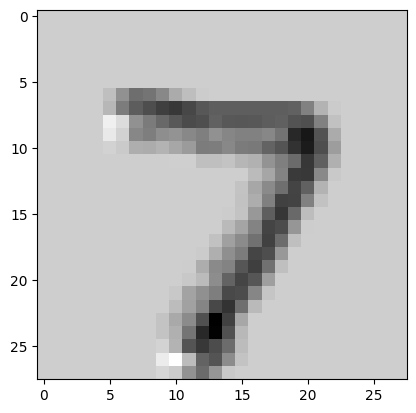

In [32]:
image = conv_layers[0](X_test[0].reshape(1, 28, 28, 1))

plt.imshow(image[0,...,0], 'gray')
plt.show()